## Анализ бизнес показателей развлекательного приложения Procrastinate Pro+

«Procrastinate Pro+» - развлекательное приложение. Несколько прошлых месяцев наш бизнес несет убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Нам нужно разобраться в причинах этой ситуации и помочь компании выйти в плюс.

Есть данные о пользователях, привлеченных с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях;
- выгрузка их покупок за этот период;
- рекламные расходы.

Нам предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются;
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент;
- когда расходы на привлечение клиента окупаются;
- какие факторы мешают привлечению клиентов.

**Цель исследования:**

Тщательно проанализировать имеющиеся данные и бизнес показатели приложения, затем выделить причины неэффективности привлечения пользователей и сформировать рекомендации для отдела маркетинга для повышения эффективности. 

**Ход исследования:**

Все необходмые данные получим из файлов `visits_info_short.csv`, `orders_info_short.csv` и `costs_info_short.csv`. Нам понадобится для начала обзор данных, так как сейчас нет информации об их качестве. Проверим соответствие типов данных в каждой колонке, а также поищем дубликаты. Зададим функции для расчета и анализа LTV, ROI, RR и CR. Проведем исследовательсткий анализ данных, а также произведем маркетинговые расчеты и оценим окупаемость рекламы для привлечения пользователей. В итоге сделаем вывод, который подытожит цель исследования.

Таким образом, анализ пройдёт в шесть шагов:

1. Загрузка, изучение и предобработка данных.
2. Назначение функций для расчета и анализа LTV, ROI, RR и CR.
3. Исследовательский анализ данных.
4. Маркетинговые расчеты.
5. Оценка окупаемости рекламы для привлечения пользователей.
6. Общий вывод.

⚠️

Импортируем сразу же нужные библиотеки, затем в процессе будем добавлять при необходимости и другие:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import math

### 1. Загрузка, изучение и предобработка данных

Начнем анализ с загрузки данных из файлов. Изучим данные и оптимизируем, путем проверки наличия дубликатов, а также перевода типа данных в нужный формат, если это потребуется. 

#### 1.1 Загрузка и изучение данных

Изучим общую информацию по каждой таблице. Для начала прочитаем все файлы из папки `/datasets` по очереди и сохраним их в переменные:
- `visits_info_short.csv` сохраним в `visits`;
- `orders_info_short.csv` сохраним в `orders`;
- `costs_info_short.csv` сохраним в `costs`. 

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

Выведем случайные десять строк каждой таблицы по очереди, чтобы взглянуть на данные впервые и сразу в разных местах. Для этого вызовем функцию `sample()`. Затем сразу же познакомимся с данными при помощи вызова `info()`, изучим их. В том числе посмотрим типы данных и количество столбцов:

In [3]:
display(visits.sample(n = 10, random_state = 1))
visits.info()

,User Id,Region,Device,Channel,Session Start,Session End
211274,738535139711,UK,Android,organic,2019-05-09 15:06:53,2019-05-09 15:48:50
273259,680497695721,Germany,Android,LeapBob,2019-09-02 14:07:28,2019-09-02 14:11:43
205897,728963351414,United States,Mac,organic,2019-10-29 10:45:58,2019-10-29 10:47:25
297860,174899252198,UK,PC,LeapBob,2019-10-11 01:38:37,2019-10-11 01:47:59
169513,513791433815,United States,Android,TipTop,2019-10-02 15:05:58,2019-10-02 15:29:16
68421,332224842734,United States,PC,organic,2019-07-07 21:03:48,2019-07-07 21:35:22
53262,112607694631,United States,Mac,FaceBoom,2019-06-25 00:17:22,2019-06-25 00:52:21
27056,797073249411,United States,Android,organic,2019-05-28 09:38:35,2019-05-28 09:38:49
226350,531038849208,UK,Android,OppleCreativeMedia,2019-06-08 14:39:12,2019-06-08 15:17:15
279171,856315246559,UK,PC,OppleCreativeMedia,2019-09-14 04:52:55,2019-09-14 04:56:56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Файл `visits_info_short.csv` содержит данные с информацией о 309 901 пользователе, которые посещали сайт. Всего в таблице 6 столбцов. Типы данных: `int` и `object`. Согласно документации к данным:
- `User Id` — уникальный идентификатор пользователя;
- `Device` — категория устройства пользователя;
- `Session start` — дата и время начала сессии;
- `Session End` — дата и время окончания сессии;
- `Channel` — идентификатор рекламного источника, из которого пришел пользователь;
- `Region` — страна пользователя.

In [4]:
display(orders.sample(10))
orders.info()

,User Id,Event Dt,Revenue
361,69209036971,2019-05-10 13:46:41,4.99
30946,150348961124,2019-07-12 20:34:09,4.99
34893,148596390037,2019-09-06 10:13:01,4.99
35253,719979362936,2019-09-10 14:17:22,4.99
32627,920325736587,2019-08-08 06:45:40,4.99
28570,295795879965,2019-05-24 01:23:13,19.99
3575,547684681026,2019-06-15 22:11:52,4.99
9614,204579228971,2019-07-27 20:46:28,4.99
35655,401579515947,2019-09-15 10:27:09,4.99
40164,719598316231,2019-10-31 13:25:08,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Файл `orders_info_short.csv` содержит данные с информацией о 40 212 пользователях, которые совершали покупки. Всего в таблице 3 столбца. Типы данных: `float`, `int` и `object`. Согласно документации к данным:
- `User Id` — уникальный id пользователя, который сделал заказ;
- `Event Dt` — дата и время покупки;
- `Revenue` — выручка.

In [5]:
display(costs.sample(10))
costs.info()

,dt,Channel,costs
1663,2019-06-13,lambdaMediaAds,4.00
730,2019-05-11,YRabbit,11.10
1550,2019-08-19,WahooNetBanner,38.40
1461,2019-05-22,WahooNetBanner,9.00
39,2019-06-09,FaceBoom,163.90
1282,2019-05-23,OppleCreativeMedia,5.00
1413,2019-10-01,OppleCreativeMedia,16.75
456,2019-08-05,RocketSuperAds,14.56
1631,2019-05-12,lambdaMediaAds,14.40
721,2019-05-02,YRabbit,9.90


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Файл `costs_info_short.csv` содержит данные с информацией о затратах на маркетинг, то есть в целом о расходах на рекламу. Всего в таблице 3 столбца. Типы данных: `float`, `int` и `object`. Согласно документации к данным:
- `Channel` — идентификатор рекламного источника;
- `dt` — дата;
- `Costs` — затраты на этот рекламный источник в этот день.

Видим, что:
- в таблице `visits` тип данных в столбцах `Session Start` и `Session End` должен быть в формате даты, а не строк;
- в таблице `visits` названия столбцов нужно привести к «змеиному регистру»;
- в таблице `orders` тип данных в столбце `Event Dt` должен быть в формате даты, а не строк;
- в таблице `orders` названия столбцов нужно привести к «змеиному регистру»;
- в таблице `costs` тип данных в столбце `dt` должен быть в формате даты, а не строк;
- в таблице `costs` названия столбцов нужно привести к «змеиному регистру»;
- какие-либо пропуски во всех таблицах отсутствуют.

**Вывод:**

В таблицах — данные о пользователях, привлеченных с 1 мая по 27 октября 2019 года. Логи сервера с данными об их посещениях, выгрузка их покупок за этот период, а также данные о затратах на маркетинг, то есть в целом о расходах на рекламу.

Предварительно можем утверждать, что данных достаточно для проведения исследования, однако нужно привести типы данных к правильным, а названия некоторых столбцов привести к «змеиному регистру». Вероятно, что неправильный тип данных связан с проблемами при выгрузке данных, либо из-за несовместимости какой-то архитектурной составляющей из предыдущей программы, в рамках которой выгружали данные. На человеческий фактор это не похоже. 

Обработаем все замеченные недочеты, затем приступим к назначению функций, исследовательскому анализу данных, маркетинговым расчетам и оценке окупаемости рекламы для привлечения пользователей. 

#### 1.2 Предобработка данных

Оптимизируем данные. Заменим типы данных на правильные, приведем названия столбцов к «змеиному регистру». Проверим данные на наличие дубликатов.

В таблице `visits`:
- тип данных в столбцах `Session Start` и `Session End` приведем в формат даты;
- названия столбцов приведем к «змеиному регистру»;
- проверим наличие дубликатов.

In [6]:
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])

In [7]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]

In [8]:
visits.duplicated().sum()

0

В таблице `orders`:
- тип данных в столбце `Event Dt` приведем в формат даты;
- названия столбцов приведем к «змеиному регистру»;
- проверим наличие дубликатов.

In [9]:
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])

In [10]:
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]

In [11]:
orders.duplicated().sum()

0

В таблице `costs`:
- тип данных в столбце `dt` приведем в формат даты;
- названия столбцов приведем к «змеиному регистру»;
- проверим наличие дубликатов.

In [12]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [13]:
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns.values]

In [14]:
costs.duplicated().sum()

0

**Вывод:**

Ранее предположили, что неправильный тип данных мог быть связан с проблемами при выгрузке данных, либо из-за несовместимости какой-то архитектурной составляющей из предыдущей программы, в рамках которой выгружали данные. Мы заменили типы данных на правильные, проверили каждую таблицу на наличие дубликатов, которых в итоге не было, а также привели названия столбцов к «змеиному регистру». 

Все это помогло нам оптимизировать данные, что поможет при дальнейшей работе. 

**Вывод по шагу:**

Мы загрузили необходимые файлы и изучили их, что позволило получить примерное представление об объемах работы и количестве данных. В файлах были данные о посещениях, покупках и о затратах на маркетинг. 

Также мы исправили все замеченные недочеты в данных, которые могли помешать исследованию или затруднить процесс в целом. Заменили типы данных на правильные, где это было нужно. Проверили каждую таблицу на наличие дубликатов, привели названия столбцов к «змеиному регистру».

Теперь с данными все в порядке, дубликатов в них не было. 

### 2. Назначение функций для расчета и анализа LTV, ROI, RR и CR

На этом шаге подготовим функции для расчета и анализа:
- **LTV**, или Lifetime Value, — это «пожизненная ценность» клиента, то есть общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок;
- **ROI**, или Return On Investment, — окупаемость инвестиций;
- **RR**, или Retention Rate, - коэффициент удержания;
- **CR**, или Conversion Rate, - конверсия.

Момент анализа - 01.11.2019.
Горизонт анализа - 14 дней. 

In [15]:
import time
from datetime import datetime
from datetime import date, timedelta

observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

Функция для расчета пожизненной ценности клиента и окупаемости инвестиций - LTV и ROI:

In [16]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions = [],
    ignore_horizon = False,
):

    #исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days = horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    #добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on = 'user_id', how = 'left'
    )
    #рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    #группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    #функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        #строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index = dims, columns = 'lifetime', values = 'revenue', aggfunc = 'sum'
        )
        #находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis = 1)
        #вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns = {'user_id': 'cohort_size'})
        )
        #объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)
        #считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis = 0)
        #исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        #восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        #собираем датафрейм с данными пользователей и значениями CAC, 
        #добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        #считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        #считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        #удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        #восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        #добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        #в финальной таблице оставляем размеры когорт, CAC
        #и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        #возвращаем таблицы LTV и ROI
        return result, roi

    #получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    #для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    #получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  #сырые данные
        result_grouped,  #таблица LTV
        result_in_time,  #таблица динамики LTV
        roi_grouped,  #таблица ROI
        roi_in_time,  #таблица динамики ROI
    )

Функция для визуализации LTV и ROI:

In [17]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window = 7):

    #задаём сетку отрисовки графиков
    plt.figure(figsize = (20, 10))

    #из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns = ['cohort_size'])
    #в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns = ['cohort_size'])[[horizon - 1]]

    #стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    #из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns = ['cohort_size', 'cac'])
    #в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns = ['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    #первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid = True, ax = ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    #второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    #столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index = 'dt', columns = columns, values = horizon - 1, aggfunc = 'mean'
    )
    filter_data(filtered_data, window).plot(grid = True, ax = ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    #третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    #столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index = 'dt', columns = columns, values = 'cac', aggfunc = 'mean'
    )
    filter_data(filtered_data, window).plot(grid = True, ax = ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    #четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid = True, ax = ax4)
    plt.axhline(y = 1, color = 'red', linestyle = '--', label = 'Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    #пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey = ax4)
    #столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index = 'dt', columns = columns, values = horizon - 1, aggfunc = 'mean'
    )
    filter_data(filtered_data, window).plot(grid = True, ax = ax5)
    plt.axhline(y = 1, color = 'red', linestyle = '--', label = 'Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Функция для расчета удержания - RR:

In [18]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions = [],
    ignore_horizon = False,
):

    #добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    #исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days = horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    #собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on = 'user_id', how = 'left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    
    #функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns = {'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    #получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    #получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    #возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция для визуализации удержания - RR:

In [19]:
def plot_retention(retention, retention_history, horizon, window = 7):

    #задаём размер сетки для графиков
    plt.figure(figsize = (15, 10))

    #исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns = ['cohort_size', 0])
    #в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns = ['cohort_size'])[
        [horizon - 1]
    ]

    #если в индексах таблицы удержания только payer,
    #добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    #в таблице графиков — два столбца и две строки, четыре ячейки
    #в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid = True, ax = ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    #во второй ячейке строим кривые удержания неплатящих
    #вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid = True, ax = ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    #в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    #получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    #фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index = 'dt', columns = columns, values = horizon - 1, aggfunc = 'mean'
    )
    filter_data(filtered_data, window).plot(grid = True, ax = ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    #в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    #фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index = 'dt', columns = columns, values = horizon - 1, aggfunc = 'mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

Функция для расчета конверсии - CR:

In [20]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions = [],
    ignore_horizon = False,
):

    #исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days = horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    #определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    #добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on = 'user_id', how = 'left'
    )

    #рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    #группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    #функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns = {'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)
        #делим каждую «ячейку» в строке на размер когорты
        #и получаем conversion rate
        result = result.div(result['cohort_size'], axis = 0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    #получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    #для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    #получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    #возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Функция для визуализации конверсии - CR:

In [21]:
def plot_conversion(conversion, conversion_history, horizon, window = 7):

    #задаём размер сетки для графиков
    plt.figure(figsize = (15, 5))

    #исключаем размеры когорт
    conversion = conversion.drop(columns = ['cohort_size'])
    #в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns = ['cohort_size'])[
        [horizon - 1]
    ]

    #первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid = True, ax = ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    #второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey = ax1)
    columns = [
        #столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index = 'dt', columns = columns, values = horizon - 1, aggfunc = 'mean'
    )
    filter_data(filtered_data, window).plot(grid = True, ax = ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Функция для сглаживания фрейма:

In [22]:
def filter_data(df, window):
    #для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

**Вывод по шагу:**

В этом шаге ничего не выявляли и не расчитывали, предварительно определили момент анализа и горизонт анализа, затем подготовили функции для расчета и анализа: LTV, ROI, RR и CR. В том числе для визуализации, а также для сглаживания фрейма.  

### 3. Исследовательский анализ данных

Теперь займемся исследовательским анализом данных, в котором:
- создадим пользовательские профили, определим минимальную и максимальную даты привлечения пользователей.
- выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

**Создаем пользовательские профили, определяем минимальную и максимальную даты привлечения пользователей:**

Функция для создания пользовательских профилей:

In [23]:
def get_profiles(sessions, orders, ad_costs):

    #находим параметры первых посещений
    profiles = (
        sessions.sort_values(by = ['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns = {'session_start': 'first_ts'})
        .reset_index()
    )

    #для когортного анализа определяем дату первого посещения
    #и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format = "%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    #добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    #считаем количество уникальных пользователей
    #с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns = {'user_id': 'unique_users'})
        .reset_index()
    )

    #объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on = ['dt', 'channel'], how = 'left')

    #делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    #добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on = ['dt', 'channel'],
        how = 'left',
    )

    #стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Получим профили пользователей. Для этого вызовем функцию `get_profiles()`, передав ей данные о посещениях, покупках и тратах на рекламу:

In [24]:
#получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Определим минимальную и максимальную даты привлечения пользователей:

In [25]:
#доступный интервал привлечения пользователей
min_analysis_date = profiles['dt'].min()
#момент анализа
observation_date = profiles['dt'].max()

print('Минимальная дата привлечения пользователей:', min_analysis_date)
print('Максимальная дата привлечения пользователей:', observation_date)

Минимальная дата привлечения пользователей: 2019-05-01 00:00:00
Максимальная дата привлечения пользователей: 2019-10-27 00:00:00


Все соответствует условию по имеющимся данным: "Есть данные о пользователях, привлеченных с 1 мая по 27 октября 2019 года".

**Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны:**

Построим таблицу, отражающую количество пользователей и их долю из каждой страны

In [26]:
region_share = pd.DataFrame()
region_share['users_cnt'] = profiles.groupby('region')['user_id'].count()
region_share['share'] = ((region_share['users_cnt'] / profiles['region'].count()) * 100)
region_share.sort_values(by = 'share', ascending = False).style.format({'share': '{:.2f}%'})

,users_cnt,share
region,,
United States,100002,66.66%
UK,17575,11.72%
France,17450,11.63%
Germany,14981,9.99%


Как видим, подавляющее число пользователей из США - 66.66%. Затем следуют примерно равные доли пользователей из Великобритании и Франции - ~12%, а также Германия - ~10%.

Теперь построим таблицу, отражающую количество платящих пользователей и долю платящих из каждой страны

In [27]:
region_payer_share = pd.DataFrame()
region_payer_share['users_cnt'] = profiles.query('payer == True').groupby('region')['user_id'].count()
region_payer_share['share'] = ((region_payer_share['users_cnt'] / profiles.query('payer == True')['region'].count()) * 100)
region_payer_share.sort_values(by = 'share', ascending = False).style.format({'share': '{:.2f}%'})

,users_cnt,share
region,,
United States,6902,77.72%
UK,700,7.88%
France,663,7.47%
Germany,616,6.94%


Снова пользователи из США лидируют, только в этот раз платящие - ~79%. Из Великобритании и Франции также примерно одинаковые доли - ~7%, а в Германии - ~6%.

Рассчитаем долю платящих пользователей отдельно по странам.

In [28]:
def pivot_share_result(column, df):
    result = pd.DataFrame()
    result['users_cnt'] = df.groupby(column)['user_id'].count()
    result['users_share'] = ((result['users_cnt'] / df[column].count()) * 100)
    result['payer_users_cnt'] = df.query('payer == True').groupby(column)['user_id'].count()
    result['payer_share'] = ((result['payer_users_cnt'] / result['users_cnt']) * 100)
    return result.sort_values(by = 'users_share', ascending = False).style.format({'users_share': '{:.2f}%',
                                                                               'payer_share': '{:.2f}%'})

pivot_share_result('region', profiles)

,users_cnt,users_share,payer_users_cnt,payer_share
region,,,,
United States,100002,66.66%,6902,6.90%
UK,17575,11.72%,700,3.98%
France,17450,11.63%,663,3.80%
Germany,14981,9.99%,616,4.11%


Видим, что доля платящих пользователей от общего количества:
- из США - 6.90%;
- из Великобритании - 3.98%;
- из Франции - 3.80%;
- из Германии - 4.11%. 

**Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства**

Построим таблицу

In [29]:
device_share = pd.DataFrame()
device_share['users_cnt'] = profiles.groupby('device')['user_id'].count()
device_share['share'] = ((device_share['users_cnt'] / profiles['device'].count()) * 100)
device_share.sort_values(by = 'share', ascending = False).style.format({'share': '{:.2f}%'})

,users_cnt,share
device,,
iPhone,54479,36.32%
Android,35032,23.35%
PC,30455,20.30%
Mac,30042,20.03%


Судя по таблице, большинство пользователей c iPhone ~36% и Android ~23%. Это значит, что пользователи больше пользуются мобильными устройствами, нежели компьютерами. Доли PC и Mac практически одинаковы ~20%.

Изучим распределение для платящих пользователей

In [30]:
device_payer_share = pd.DataFrame()
device_payer_share['users_cnt'] = profiles.query('payer == True').groupby('device')['user_id'].count()
device_payer_share['share'] = ((device_payer_share['users_cnt'] / profiles.query('payer == True')['device'].count()) * 100)
device_payer_share.sort_values(by = 'share', ascending = False).style.format({'share': '{:.2f}%'})

,users_cnt,share
device,,
iPhone,3382,38.08%
Android,2050,23.08%
Mac,1912,21.53%
PC,1537,17.31%


В целом, для платящих пользователей картина похожая, так как в лидерах снова владельцы мобильных устройств. Единственное, в этот раз отрыв у Mac больше, чем у PC.

Рассчитаем долю платящих пользователей отдельно по устройствам

In [31]:
pivot_share_result('device', profiles)

,users_cnt,users_share,payer_users_cnt,payer_share
device,,,,
iPhone,54479,36.32%,3382,6.21%
Android,35032,23.35%,2050,5.85%
PC,30455,20.30%,1537,5.05%
Mac,30042,20.03%,1912,6.36%


Наибольшая доля платящих пользователей на устройстве Mac - 6.36% от 30 042 человек. С iPhone платящих - 6.21% от 54 479 человек. На Android - 5.85% от 35 032 человек и на PC - 5.05% от 30 455 человек соответственно. 

**Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения**

Построим таблицу:

In [32]:
channel_share = pd.DataFrame()
channel_share['users_cnt'] = profiles.groupby('channel')['user_id'].count()
channel_share['share'] = ((channel_share['users_cnt'] / profiles['channel'].count()) * 100)

channel_share['payer_users_cnt'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
channel_share['payer_share'] = ((channel_share['payer_users_cnt'] / profiles.query('payer == True')['channel'].count()) * 100)

channel_share.sort_values(by = 'share', ascending = False).style.format({'share': '{:.2f}%', 'payer_share': '{:.2f}%'})

,users_cnt,share,payer_users_cnt,payer_share
channel,,,,
organic,56439,37.62%,1160,13.06%
FaceBoom,29144,19.43%,3557,40.05%
TipTop,19561,13.04%,1878,21.15%
OppleCreativeMedia,8605,5.74%,233,2.62%
LeapBob,8553,5.70%,262,2.95%
WahooNetBanner,8553,5.70%,453,5.10%
RocketSuperAds,4448,2.97%,352,3.96%
MediaTornado,4364,2.91%,156,1.76%
YRabbit,4312,2.87%,165,1.86%


Видим, что:
- если посмотреть на разбивку по источникам привлечения для всех пользователей, то можно заметить, что больше всего пользователей приходится на органический трафик - ~38%. Затем идут FaceBoom - ~19% и TipTop - ~13%;
- разбивка по платящим выглядит иначе. Большинство платящих пользователей пришло через источник FaceBoom - ~40%, TipTop - ~21% и в этом случае лишь ~13% приходится на органику;
- по остальным каналам распределение калеблется в районе ~2-5%, что при разбивке по всем пользователем, что только по платящим. Самый непопулярный канал для всех сегментов пользователей - lambdaMediaAds, а для платящих - MediaTornado.

Теперь рассчитаем долю платящих пользователей отдельно по каналам привлечения

In [33]:
pivot_share_result('channel', profiles)

,users_cnt,users_share,payer_users_cnt,payer_share
channel,,,,
organic,56439,37.62%,1160,2.06%
FaceBoom,29144,19.43%,3557,12.20%
TipTop,19561,13.04%,1878,9.60%
OppleCreativeMedia,8605,5.74%,233,2.71%
LeapBob,8553,5.70%,262,3.06%
WahooNetBanner,8553,5.70%,453,5.30%
RocketSuperAds,4448,2.97%,352,7.91%
MediaTornado,4364,2.91%,156,3.57%
YRabbit,4312,2.87%,165,3.83%


Большинство платящих пользователей приходится на каналы:
- FaceBoom 12.20%;
- AdNonSense 11.34%;
- lambdaMediaAds 10.47%.

Меньше всего конвертируются в платящих пользователи из каналов:
- organic 2.06%;
- OppleCreativeMedia 2.71%;
- LeapBob 3.06%.

**Вывод по шагу:**

Сначала мы создали пользовательские профили, использовав функцию get_profiles(). Определили минимальную (2019-05-01 00:00:00) и максимальную (2019-10-27 00:00:00) даты привлечения пользователей. 

Построили таблицу, показывающую количество пришедших пользователей и их долю из каждой страны. Подавляющее число пользователей из США - 66.66%. Затем следуют примерно равные доли пользователей из Великобритании и Франции - ~12%, а также Германия - ~10%. Также изучили платящих пользователей и их долю по каждой стране. Пользователи из США лидируют, только в этот раз платящие - ~79%. Из Великобритании и Франции также примерно одинаковые доли - ~7%, а в Германии - ~6%. Помимо этого выявили доли платящих пользователей от общего количества:
- из США - 6.90%;
- из Великобритании - 3.98%;
- из Франции - 3.80%;
- из Германии - 4.11%.

Выяснили, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Судя по таблице, большинство пользователей c iPhone ~36% и Android ~23%. Это значит, что пользователи больше пользуются мобильными устройствами, нежели компьютерами. Доли PC и Mac практически одинаковы ~20%. В целом, для платящих пользователей картина похожая, так как в лидерах снова владельцы мобильных устройств. Единственное, в этот раз отрыв у Mac больше, чем у PC. Наибольшая доля платящих пользователей на устройстве Mac - 6.36% от 30 042 человек. С iPhone платящих - 6.21% от 54 479 человек. На Android - 5.85% от 35 032 человек и на PC - 5.05% от 30 455 человек соответственно.

Изучили рекламные источники и определили те, из которых пришло больше всего платящих пользователей. Больше всего пользователей приходится на органический трафик - ~38%. Затем идут FaceBoom - ~19% и TipTop - ~13%. Разбивка по платящим выглядит иначе. Большинство платящих пользователей пришло через источник FaceBoom - ~40%, TipTop - ~21% и в этом случае лишь ~13% приходится на органику.

Большинство платящих пользователей приходится на каналы:
- FaceBoom 12.20%;
- AdNonSense 11.34%;
- lambdaMediaAds 10.47%.

Меньше всего конвертируются в платящих пользователи из каналов:
- organic 2.06%;
- OppleCreativeMedia 2.71%;
- LeapBob 3.06%.


### 4. Маркетинговые расчеты

В этом шаге мы займемся маркетинговыми расчетами, а именно:
- посчитаем общую сумму расходов на маркетинг и выясним, как траты распределены по источникам. Визуализируем изменения метрик во времени: cколько денег потратили всего/на каждый источник/по времени?;
- узнаем, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика. В процессе будем использовать профили пользователей.

Посчитаем общую сумму расходов на маркетинг

In [34]:
costs_sum = costs['costs'].sum()
print('Общая сумма расходов на маркетинг', costs_sum, 'у.е.')

Общая сумма расходов на маркетинг 105497.30000000002 у.е.


Посмотрим на график изменения расходов на маркетинг во времени

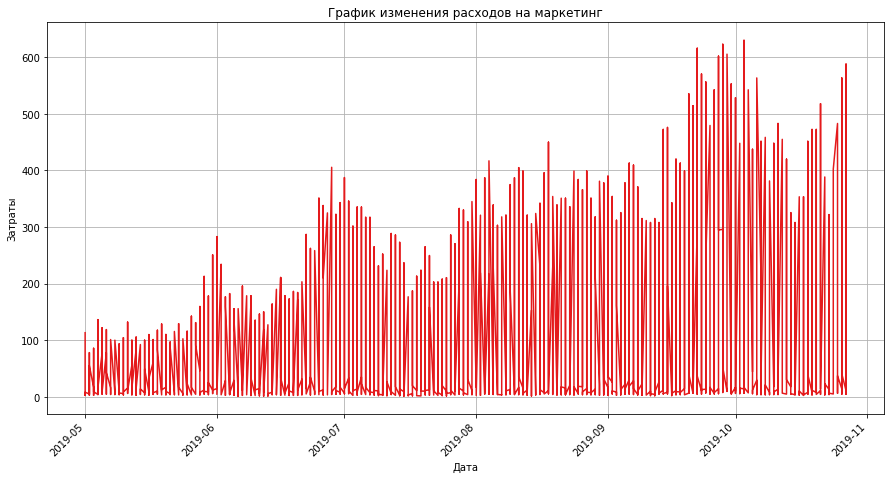

In [35]:
costs.plot(y = 'costs',
           x = 'dt',
           figsize = (15, 8),
           grid = True, 
           rot = 45,                            
           legend = False,
           colormap = 'Set1') 

plt.title('График изменения расходов на маркетинг')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Со временем расходы на маркетинг увеличиваются. В октябре они достигли пика, в более чем 600 у.е., после чего было снижение, но затем вновь увеличение до точки, близкой к пику.

Теперь выясним, как траты распределены по источникам и сразу визуализируем изменения

In [36]:
channel_costs_report = pd.DataFrame()
channel_costs_report['costs'] = costs.groupby('channel')['costs'].sum()
channel_costs_report['share'] = ((channel_costs_report['costs'] / costs['costs'].sum()) * 100)
channel_costs_report.sort_values(by = 'share', ascending = False).style.format({'share': '{:.2f}%', 'payer_share': '{:.2f}%'})

,costs,share
channel,,
TipTop,54751.300000,51.90%
FaceBoom,32445.600000,30.75%
WahooNetBanner,5151.000000,4.88%
AdNonSense,3911.250000,3.71%
OppleCreativeMedia,2151.250000,2.04%
RocketSuperAds,1833.000000,1.74%
LeapBob,1797.600000,1.70%
lambdaMediaAds,1557.600000,1.48%
MediaTornado,954.480000,0.90%


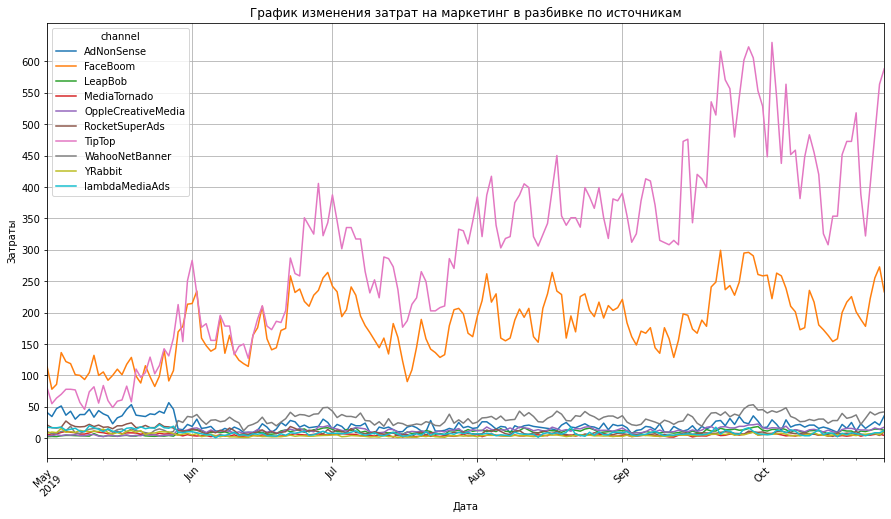

In [37]:
filtered_data = costs.pivot_table(
        index = 'dt', columns = 'channel', values = 'costs', aggfunc = 'sum'
    )
filtered_data.plot(                                             
           figsize = (15, 8),
           grid = True,
           rot = 45,        
           label = 'Каналы',                  
           legend = True,
) 

plt.yticks(np.arange(0, 650, 50))
plt.title('График изменения затрат на маркетинг в разбивке по источникам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Больше всего трат приходится на TipTip - 51.90%, затем идет FaceBoom - 30.75%. Они абсолютные лидеры, остальные источники занимают малую часть от общих затрат. У них примерно одинаково пик случился к октябре, при этом в общей динамике заметен рост трат, а вот остальные источники будто топчатся на месте. Возможно, стоит посмотреть на них в отдельном срезе, чтобы понять динамику, так как на этом графике данные по ним недостаточно показательны. Построим еще один график, но уже без лидеров

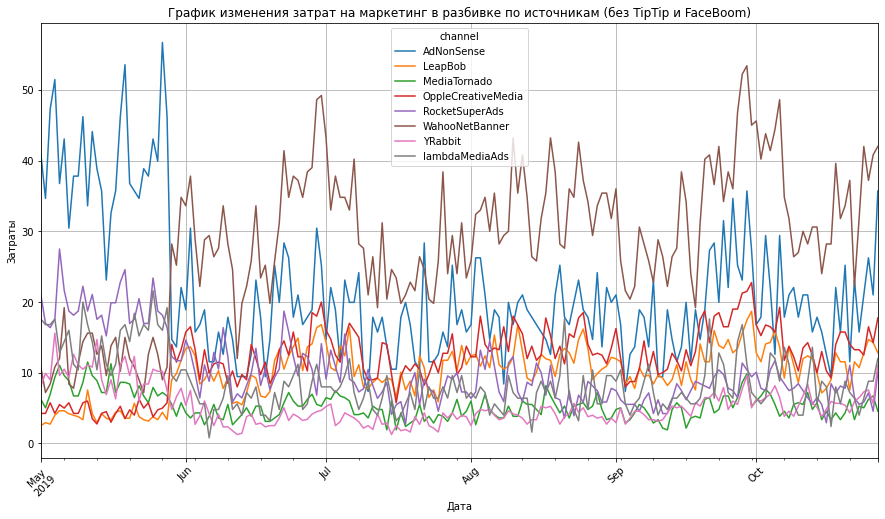

In [38]:
filtered_data2 = costs[~costs['channel'].isin(['TipTop', 'FaceBoom'])].pivot_table(
        index = 'dt', columns = 'channel', values = 'costs', aggfunc = 'sum'
    )

filtered_data2.plot(                                             
           figsize = (15, 8),
           grid = True,
           rot = 45,        
           label = 'Каналы',                   
           legend = True,
) 

plt.yticks(np.arange(0,  60, 10))
plt.title('График изменения затрат на маркетинг в разбивке по источникам (без TipTip и FaceBoom)')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Теперь график по остальным источникам выглядит нагляднее. Видим, что постепенно растут затраты на WahooNetBanner и OppleCreativeMedia. На AdNonSense затраты наоборот снижаются с каждым месяцем. По остальным источникам траты варьируются примерно в одинаковых показателях и не имеют какой-то тенденции к росту/падению. 

Узнаем, сколько в среднем стоило привлечение одного пользователя из каждого источника. Для этого потребуется рассчитать средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Будем использовать профили пользователей.

Информация о стоимости привлечения есть в столбце `acquisition_cost`. Посмотрим на числовое описание данных в этом столбце

In [39]:
profiles['acquisition_cost'].describe(include = 'all').apply("{0:.2f}".format).astype('float')

count    150008.00
mean          0.70
std           0.95
min           0.00
25%           0.00
50%           0.25
75%           1.11
max           3.72
Name: acquisition_cost, dtype: float64

Медианная стоимость привлечения одного пользователя - 0.25 у.е. Средняя стоимость привлечения - 0.70 у.е. Вероятно, что в какие-то моменты на привлечение стоило нам больше, а также в данных есть какие-то выбросы, которые влияют на такую разницу между медианой и средним. Максимальная стоимость привлечения пользователя - 3.72 у.е.

Визуализируем распределение стоимости привлечения одного пользователя

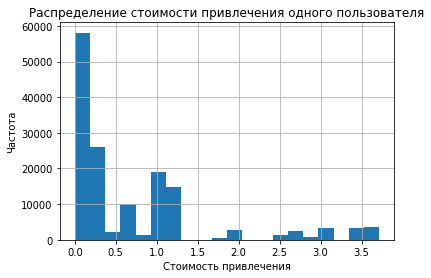

In [40]:
profiles['acquisition_cost'].hist(bins = 20)
plt.title('Распределение стоимости привлечения одного пользователя')
plt.xlabel('Стоимость привлечения')
plt.ylabel('Частота')
plt.show()

На разницу между медианой и средним оказывает влияние большое число нулевой стоимости пользователей. Похоже, что это органический трафик.

Посмотрим на CAC для каждого источника трафика.

In [41]:
cac_by_channel = pd.DataFrame()
cac_by_channel['acquisition_cost_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
cac_by_channel.sort_values(by = 'acquisition_cost_mean', ascending = False).style.format({'acquisition_cost_mean': '{:.2f}'})

,acquisition_cost_mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


В TipTop самые дорогие пользователи со средней стоимостью - 2.80 у.е., показатели по которым существенно отрываются от остальных. В лидерах также FaceBoom - 1.11 у.е. и AdNonSense - 1.01 у.е. У остальных источников стоимость привлечения меньше 1 у.е.

**Вывод по шагу:**

Мы посчитали общую сумму расходов на маркетинг - 105 497 у.е. Выяснили, как траты распределеы по источникам и визуализировали изменения метрик во времени: cколько денег потратили всего/на каждый источник/по времени?. Со временем расходы на маркетинг увеличиваются. В октябре они достигли пика, в более чем 600 у.е., после чего было снижение, но затем вновь увеличение до точки, близкой к пику.

Больше всего трат приходится на TipTip - 51.90%, затем идет FaceBoom - 30.75%. Они абсолютные лидеры, остальные источники занимают малую часть от общих затрат. У них примерно одинаково пик случился к октябре, при этом в общей динамике заметен рост трат. Также постепенно растут затраты на WahooNetBanner и OppleCreativeMedia. На AdNonSense затраты наоборот снижаются с каждым месяцем. По остальным источникам траты варьируются примерно в одинаковых показателях и не имеют какой-то тенденции к росту/падению.

Также узнали, сколько в среднем стоило привлечение одного пользователя из каждого источника. Медианная стоимость привлечения одного пользователя - 0.24 у.е. Средняя стоимость привлечения - 0.7 у.е. Максимальная стоимость привлечения пользователя - 3.71 у.е.

Рассчитали средний CAC на одного пользователя для всего проекта и для каждого источника трафика. В процессе использовали профили пользователей. В TipTop самые дорогие пользователи со средней стоимостью - 2.80 у.е., показатели по которым существенно отрываются от остальных. В лидерах также FaceBoom - 1.11 у.е. и AdNonSense - 1.01 у.е. У остальных источников стоимость привлечения меньше 1 у.е.

### 5. Оценка окупаемости рекламы для привлечения пользователей

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. На календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Выясним возможные причины обнаруженных проблем и сформируем рекомендации для рекламного отдела.

Исключим из расчетов пользователей с органическим трафиком, так как за них мы абсолютно ничего не платим. Они сами приходят.

In [42]:
profiles = profiles.query('channel != "organic"')

#### 5.1 Анализ общей окупаемости рекламы

Посмотрим на окупаемость рекламы, чтобы оценить ситуацию. Для этого рассчитаем и визуализируем LTV и ROI, вызвав функции `get_ltv()` и `plot_ltv_roi()`

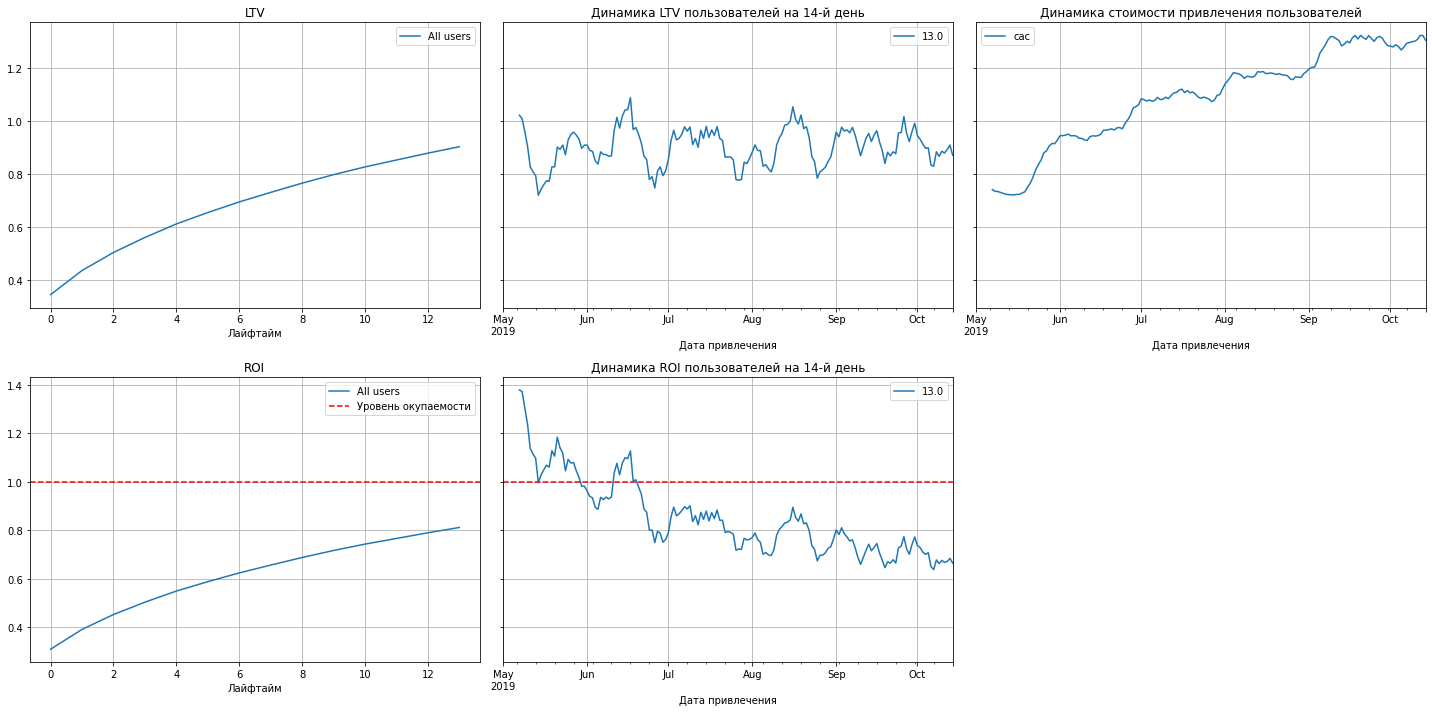

In [43]:
#считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)

#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Видим, что:
- реклама к концу 2-й недели не окупается, ROI в районе 80%;
- рекламный бюджет постоянно увеличивается, CAC не стабилен;
- на LTV влияет сезонный фактор, но сам по себе показатель довольно таки стабилен, а это значит, что вряд ли дело в ухудшении качества пользователей;
- у ROI тенденция постоянного падения, в июне показатель пересек черту окупаемости и стал падать дальше. 

Будем дальше анализировать и выявлять причины, пройдя по всем доступным характеристикам пользователей - стране, каналу и устройству.

#### 5.2 Анализ окупаемости рекламы с разбивкой по рекламным каналам

Проверим окупаемость рекламы с разбивкой по источникам привлечения. Возможно, что на окупаемость влияет неудачная реклама по каким-то конкретным источникам

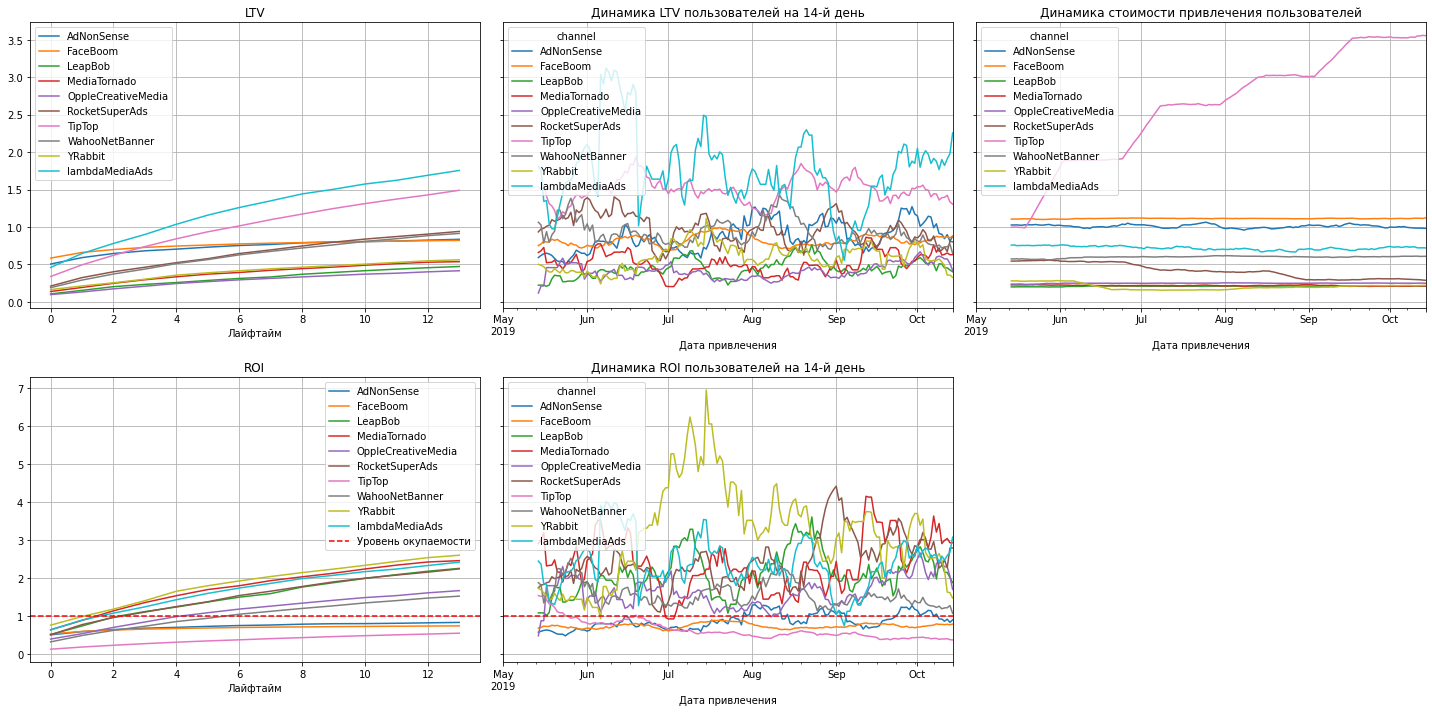

In [44]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
profiles, orders, observation_date, horizon_days, dimensions = dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Видим, что:
- есть большой рост стоимости привлечения пользователей в TipTop, что говорит о больших расходах на этот источник привлечения, несмотря на то, что результаты не такие впечатляющие для таких расходов;
- не окупаются пользователи, привлеченные через LeapBop, FaceBoom и TipTop;
- YRabbit показала себя отлично в июле - ROI пользователей на 14-й день был очень высок. 

Посмотрим на конверсию с разбивкой по каналам

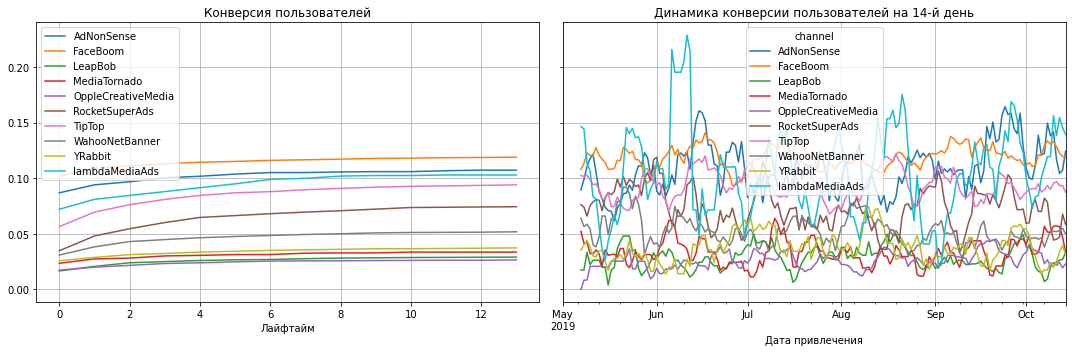

In [45]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Плохо конвертируются пользователи из каналов RocketSuperAds, MediaTornado, YRabbit

Посмотрим на удержание с разбивкой по каналам

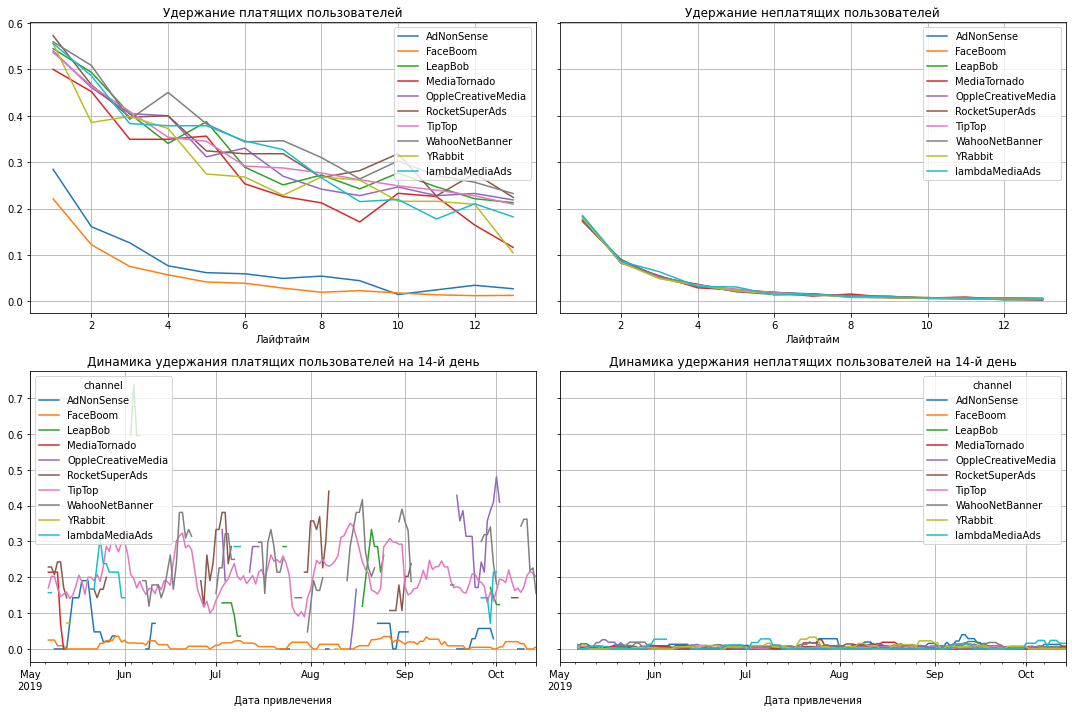

In [46]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи из каналов FaceBoom и AdNonSense очень плохо удерживаются. 

#### 5.3 Анализ окупаемости рекламы с разбивкой по странам

Теперь передадим параметру `dimensions` столбец `region`, чтобы посмотреть окупаемость с разбивкой по странам

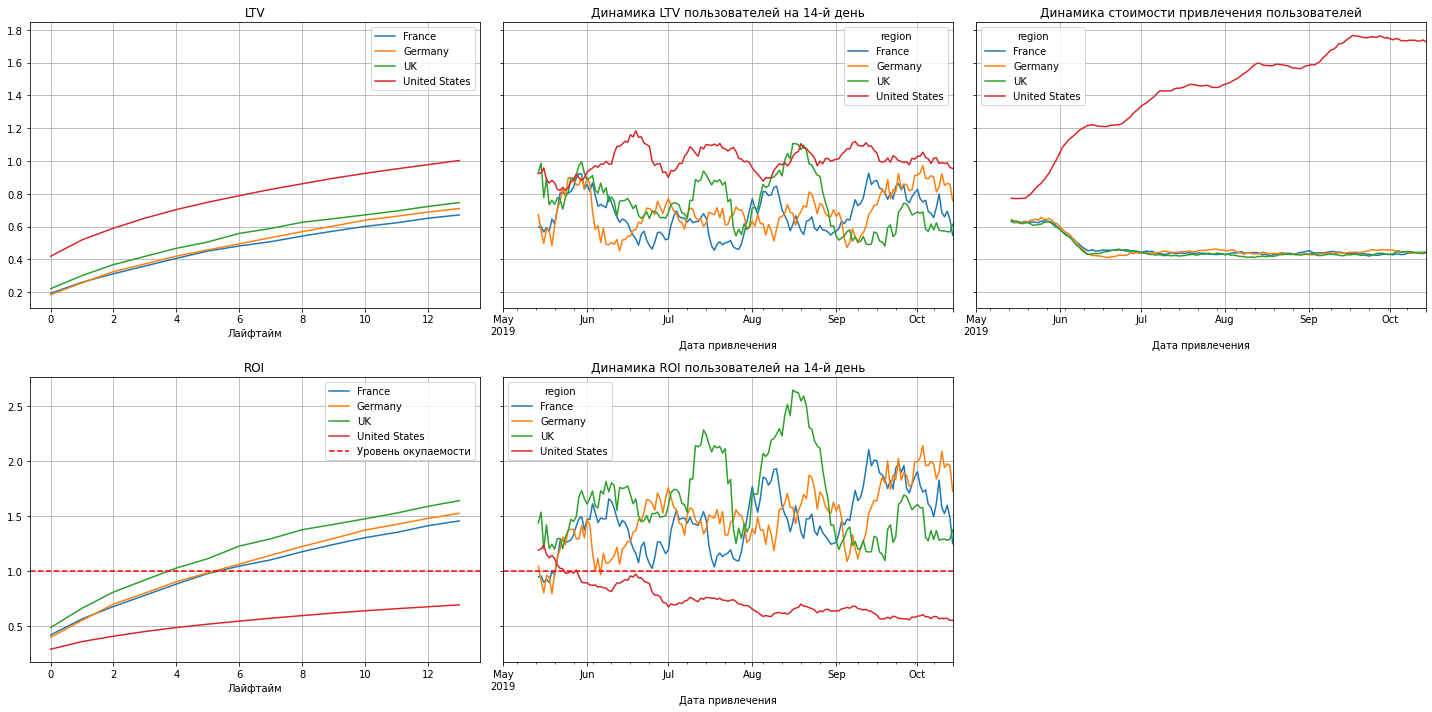

In [47]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 14) 

Видим, что:
- в США реклама вообще не окупается, хотя у нас подавляющее число пользователей из США - 66.66%, как выяснили ранее. В остальных странах реклама окупается;
- стоимость привлечения пользователей из США - самая высокая и она продолжает расти;
- LTV по-прежнему подвержен сезонности, но в целом стабилен;
- самая лучшая окупаемость в Великобритании и Германии, а вот с пользователями из США проблемы начались еще с Июня 2019 года. Возможно, что был какой-то неудачный релиз, либо на рынке появился какой-то наиболее привлекательный продукт для пользователей США или в целом политика компании изменилась каким-то кардинальным образом. 

Посчитаем и визуализируем конверсию, вызвав функции `get_conversion()` и `plot_conversion()`

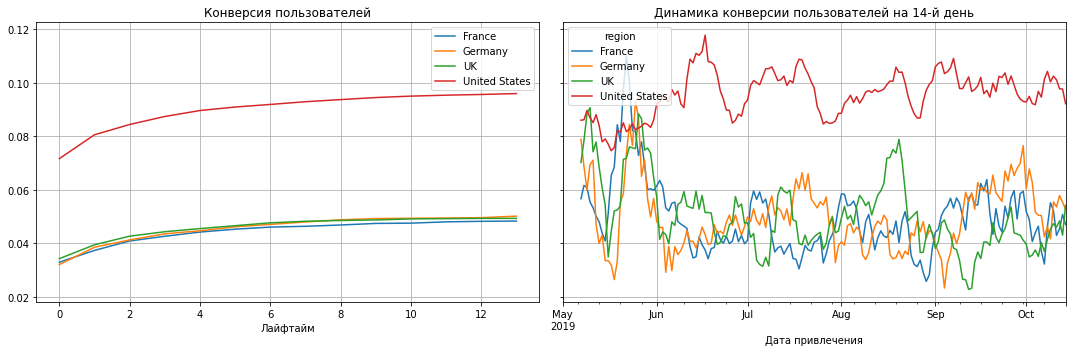

In [48]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

У пользователей из Великобритании, Германии и Франции слабая конверсия, но их доля относительно всех пользователей нельзя сказать, что большая.

Посмотрим на удержание с разбивкой по странам

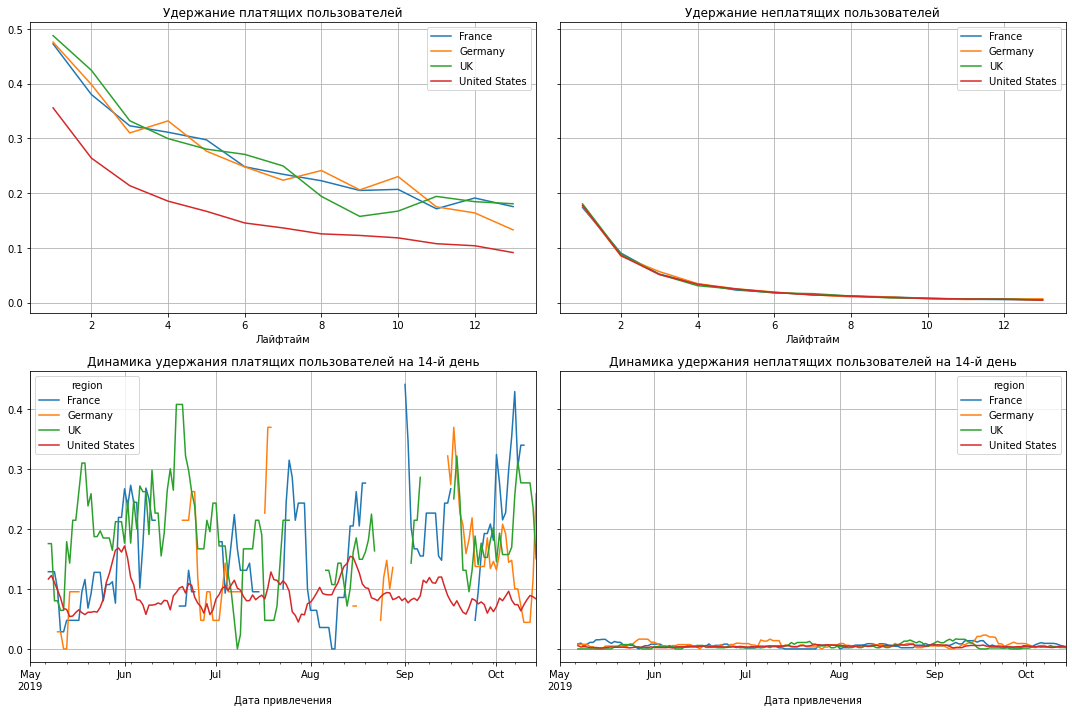

In [49]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

Видим, что пользователи из США очень плохо удерживаются. В связи с этим, к пользователям из США должно быть больше внимания. 

#### 5.4 Анализ окупаемости рекламы с разбивкой по устройствам

Теперь перейдем к окупаемости с разбивкой по устройствам

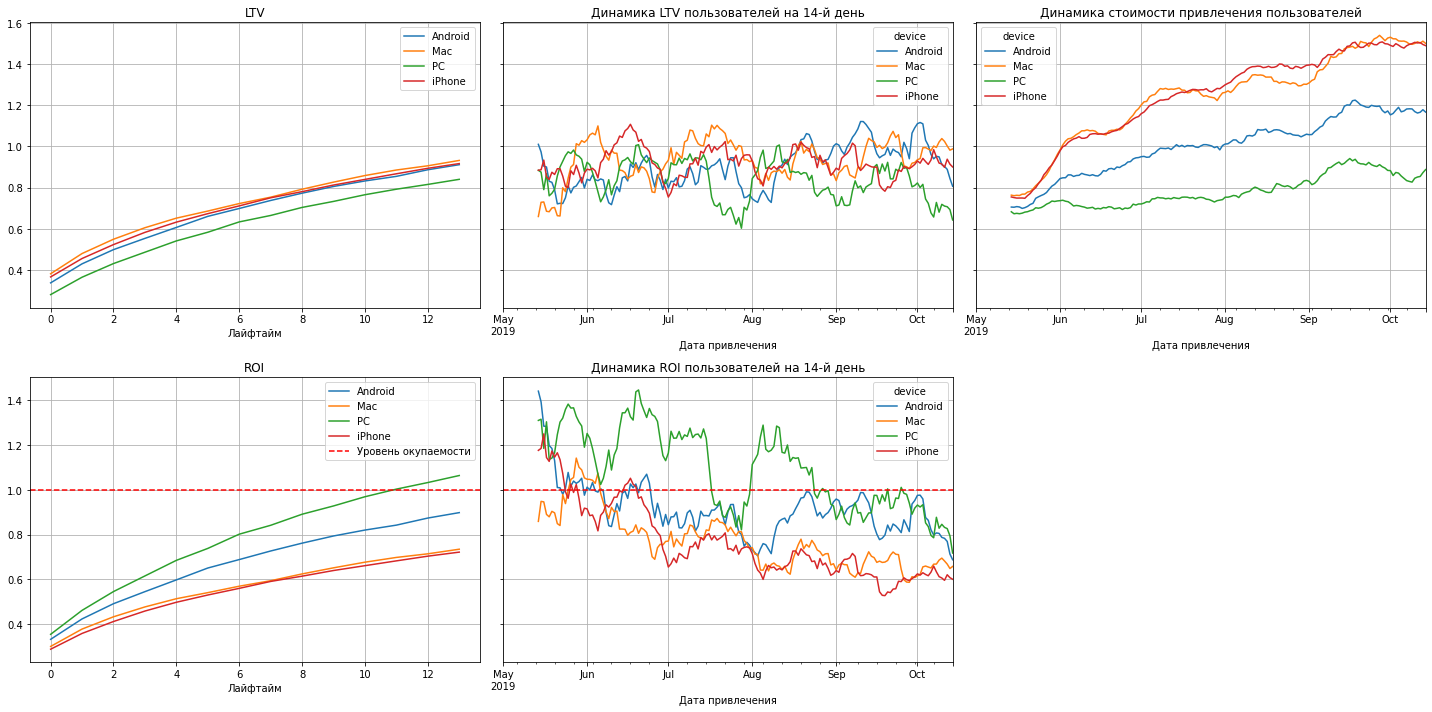

In [50]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 14) 

Пользователи всех устройств изначально окупались, но после июня что-то пошло не так, особенно у владельцев Mac и iPhone. К сентябрю, и какое-то время в августе, ROI пользователей PC на 14-й день был на грани окупаемости, ROI всех остальных устройств был уже ниже уровня начиная с июня. LTV по-прежнему подвержен сезонности, но стабилен. Стоимость привлечения пользователей PC самая низкая, а ROI - наоборот, выше остальных. В целом стоимость привлечения пользователей всех устройств росла за рассматриваемый период.

Обратить внимание нужно на владельцев Mac и iPhone, так как стоимость их привлечения высока и постоянно растет, а окупаемость страдает. 

Посчитаем и визуализируем конверсию, вызвав функции `get_conversion()` и `plot_conversion()`

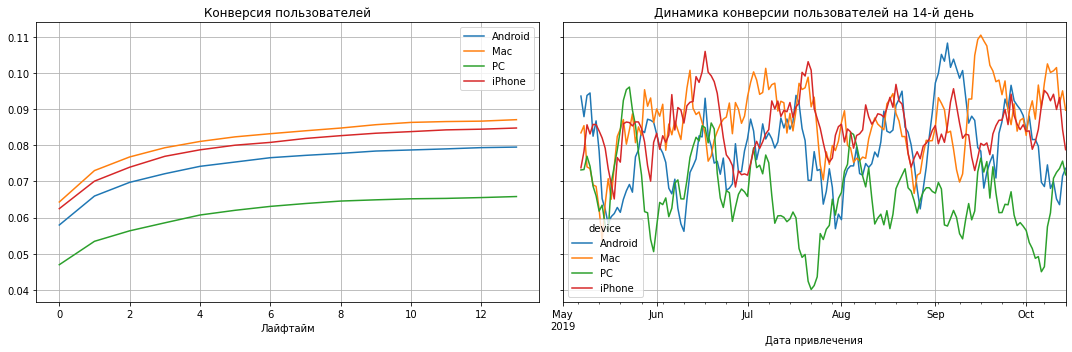

In [51]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Как видим, пользователи Mac, iPhone и Android конвертируются стабильно хорошо. Полагаем, что дело в удержании. 

Вызовем функции `get_retention()` и `plot_retention()`, чтобы рассчитать и отразить на графиках этот показатель.

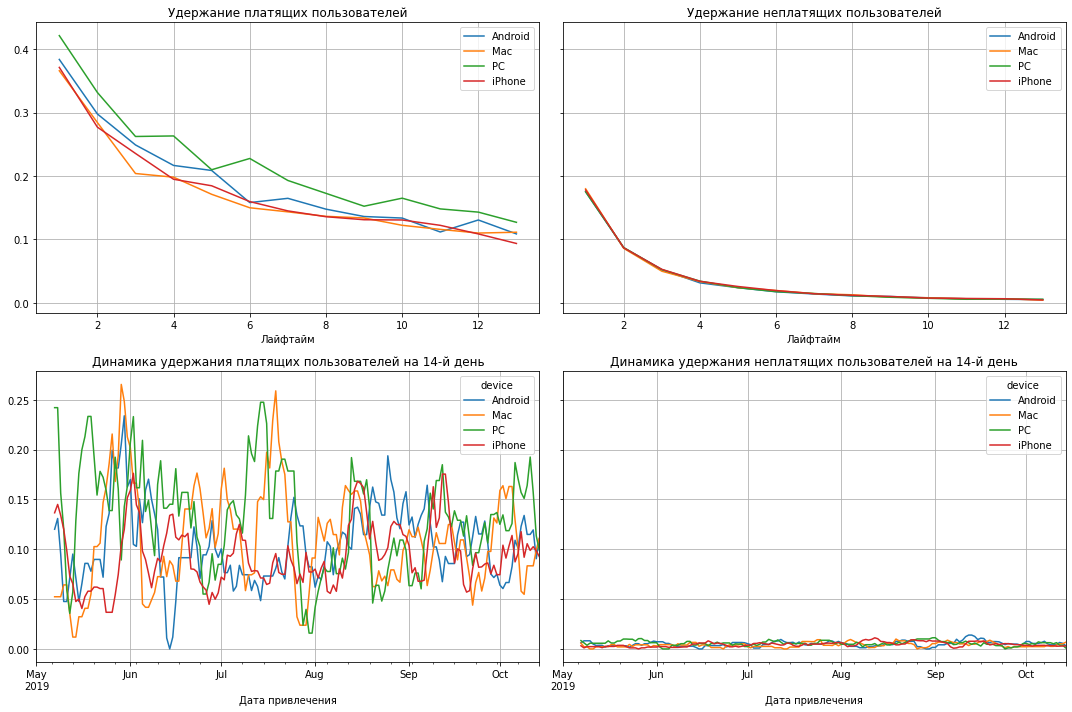

In [52]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

Нельзя сказать, что пользователи каких-то определенных устройств плохо удерживаются. Неплатящие пользователи стабильно плохо удерживаются, а из платящих лучше всего удерживаются пользователи PC, хуже - владельцы iPhone и Mac. 

**Вывод по шагу:**

В целом, реклама близка к окупаемости, но окупаемость снижают владельцы Mac и iPhone, а также в целом пользователи из США. Также не окупаются пользователи, привлеченные благодаря источникам LeapBop, FaceBoom и TipTop.

Проблемы окупаемости могут быть вызваны ненормированным распределением средств на рекламу, так как в какой-то источник вложено больше денег, чем в остальные, а он не оправдал надежд. Также возможно, что горизонт анализа недостаточен для того, чтобы пользователи окупились.

### 6. Общий вывод

#### 6.1 Причины неэффективности привлечения пользователей

Мы оценили окупаемость рекламы, рассчитали и визуализировали LTV и ROI, что, в том числе, позволило нам выявить возможные причины неэффективности привлечения пользователей. По графикам сделали следующие выводы:
- реклама к концу 2-й недели не окупается, ROI в районе 80%;
- рекламный бюджет постоянно увеличивается, CAC не стабилен;
- на LTV влияет сезонный фактор, но сам по себе показатель довольно таки стабилен, а это значит, что вряд ли дело в ухудшении качества пользователей;
- у ROI тенденция постоянного падения, в июне показатель пересек черту окупаемости и стал падать дальше. 

Для разбирательства мы прошлись по всем доступным характеристикам пользователей - стране, каналу и устройству. В итоге сделали следующие выводы. 

Разбивка по рекламным каналам:
- есть большой рост стоимости привлечения пользователей в TipTop, что говорит о больших расходах на этот источник привлечения, несмотря на то, что результаты не такие впечатляющие для таких расходов;
- не окупаются пользователи, привлеченные через LeapBop, FaceBoom и TipTop;
- YRabbit показала себя отлично в июле - ROI пользователей на 14-й день был очень высок;
- плохо конвертируются пользователи из каналов RocketSuperAds, MediaTornado, YRabbit;
- пользователи из каналов FaceBoom и AdNonSense очень плохо удерживаются.

Разбивка по странам:
- в США реклама вообще не окупается, хотя у нас подавляющее число пользователей из США - 66.66%, как выяснили ранее. В остальных странах реклама окупается;
- стоимость привлечения пользователей из США - самая высокая и она продолжает расти;
- LTV по-прежнему подвержен сезонности, но в целом стабилен;
- самая лучшая окупаемость в Великобритании и Германии, а вот с пользователями из США проблемы начались еще с Июня 2019 года. Возможно, что был какой-то неудачный релиз, либо на рынке появился какой-то наиболее привлекательный продукт для пользователей США или в целом политика компании изменилась каким-то кардинальным образом;
- у пользователей из Великобритании, Германии и Франции слабая конверсия, но их доля относительно всех пользователей нельзя сказать, что большая;
- пользователи из США очень плохо удерживаются. В связи с этим, к пользователям из США должно быть больше внимания.

Разбивка по устройствам:
- пользователи всех устройств изначально окупались, но после июня что-то пошло не так, особенно у владельцев Mac и iPhone. К сентябрю, и какое-то время в августе, ROI пользователей PC на 14-й день был на грани окупаемости, ROI всех остальных устройств был уже ниже уровня начиная с июня;
- LTV по-прежнему подвержен сезонности, но стабилен;
- стоимость привлечения пользователей PC самая низкая, а ROI - наоборот, выше остальных. В целом стоимость привлечения пользователей всех устройств росла за рассматриваемый период.

#### 6.2 Рекомендации для отдела маркетинга для повышения эффективности

С целью повышения эффективности привлечения, рекомендуем:
- обратить особое внимание на владельцев Mac и iPhone, так как стоимость их привлечения высока и продолжает расти с каждым месяцев, не давая ожидаемых результатов. Как вариант, стоит разработать новое маркетинговое предложение именно для владельцев этих устройств, чтобы они приносили больше денег;
- скорректировать рекламный бюджет по странам, так как реклама в США не окупается, возможно стоит перераспределить вливание денег в пользователей других стран. Как вариант, прицелиться на пользователей Великобритании и Германии, так как там с окупаемостью все на порядок лучше;
- перестать бездумно вливать деньги на рекламный канал TipTip, так как выхлопа от нее не столько, сколько денег на нее тратим. Очевидно, что стоит направить деньги на другие каналы, которые приносят больше профита;
- также перераспределить вливание денег из каналов LeapBop и FaceBoom, так как пользователи от них не окупаются, в другие каналы привлечения, при этом плохо удерживаются пользователи из каналов FaceBoom и AdNonSense, поэтому второй тоже можно обойти стороной и сконцентрироваться на остальных каналах привлечения. 